In [97]:
# Importamos las librerías necesarias para el análisis de los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargamos los datos en DataFrames

cash_request = pd.read_csv('/Users/aaronespinosa/Desktop/EDA-Ironpayments/project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('/Users/aaronespinosa/Desktop/EDA-Ironpayments/project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv')

### Tratamiento del dataframe 'cash_request'

In [98]:
# Comprobamos que los datos se han cargado correctamente y visualizamos las primeras filas de cada DataFrame
# para hacernos una idea de la estructura de los datos y de las columnas que contienen los DataFrames

# Comprobamos si hay valores nulos en el DataFrame cash_request
cash_request.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [99]:
# Visualizamos las primeras filas del DataFrame cash_request
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [100]:
# Información sobre el DataFrame cash_request
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [101]:
# Estadísticas descriptivas del DataFrame cash_request, usamos transpose para que se visualicen mejor
cash_request.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,23970.0,13910.966124,7788.117214,3.0,7427.25,14270.5,20607.75,27010.0
amount,23970.0,82.720818,26.528065,1.0,50.00,100.0,100.00,200.0
user_id,21867.0,32581.250789,27618.565773,34.0,10804.00,23773.0,46965.00,103719.0
deleted_account_id,2104.0,9658.755228,7972.743249,91.0,3767.00,6121.5,16345.00,30445.0


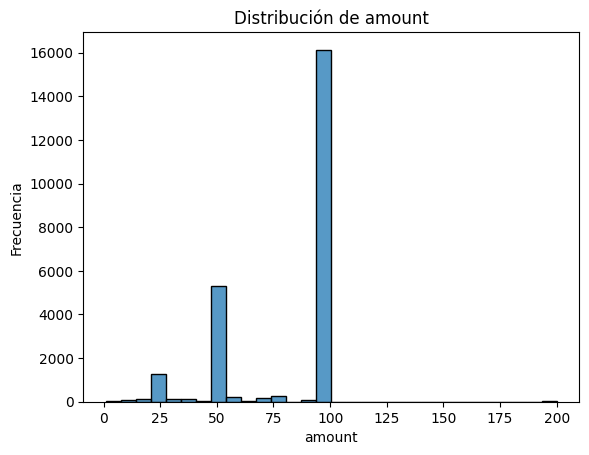

In [102]:
# Histograma de la variable amount
sns.histplot(cash_request['amount'], bins=30) 

plt.title('Distribución de amount') # Título del histograma
plt.xlabel('amount')                # Etiqueta del eje x
plt.ylabel('Frecuencia')            # Etiqueta del eje y
plt.show()                          # Mostramos el histograma

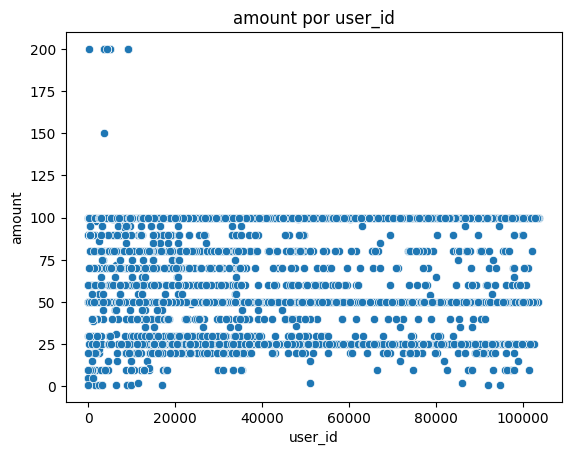

In [103]:
# Scatterplot de la variable amount en función de user_id
sns.scatterplot(x='user_id', y='amount', data=cash_request)

plt.title('amount por user_id') # Título del scatterplot
plt.xlabel('user_id')           # Etiqueta del eje x
plt.ylabel('amount')            # Etiqueta del eje y
plt.show()                      # Mostramos el scatterplot

### **0. Creación de las cohortes por mes:** Basado en el mes de creación de la primera transacción (created_at)

1. Convertir la columna created_at a formato datetime
2. Crear una nueva columna 'mes_cohorte' con el mes de la columna 'created_at'

In [104]:
# Convertir la columna created_at a formato datetime
cash_request['created_at'] = pd.to_datetime(cash_request['created_at'])

cash_request.info() # Comprobamos que la columna created_at se ha convertido a formato datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [105]:
# Crear una nueva columna 'mes_cohorte' con el mes de la columna 'created_at'
cash_request['mes_cohorte'] = cash_request['created_at'].dt.to_period('M')  

cash_request.head() # Visualizamos las primeras filas del DataFrame cash_request para comprobar que se ha creado la nueva columna

/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_8421/829386301.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request['mes_cohorte'] = cash_request['created_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,mes_cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05


### **1. Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

1. Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas

En nuestro caso añadimos la columna 'id' con la cantidad de estas en cada 'mes_cohorte'

In [106]:
# Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas

cohortes_count = cash_request.groupby(by='mes_cohorte').agg({ 
  'id': 'count', # Contamos el número de transacciones por mes de cohorte
  })
cohortes_count

,id
mes_cohorte,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2019-11'),
  Text(1, 0, '2019-12'),
  Text(2, 0, '2020-01'),
  Text(3, 0, '2020-02'),
  Text(4, 0, '2020-03'),
  Text(5, 0, '2020-04'),
  Text(6, 0, '2020-05'),
  Text(7, 0, '2020-06'),
  Text(8, 0, '2020-07'),
  Text(9, 0, '2020-08'),
  Text(10, 0, '2020-09'),
  Text(11, 0, '2020-10'),
  Text(12, 0, '2020-11')])

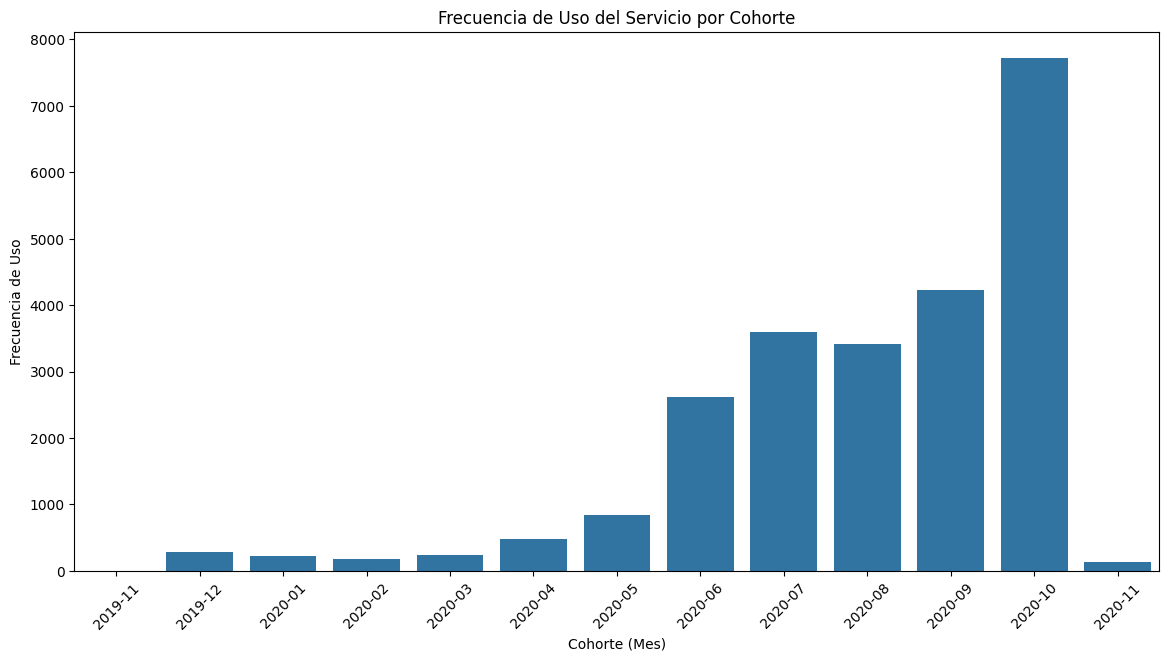

In [107]:
plt.figure(figsize=(14, 7)) # Tamaño de la figura

# Barplot de la variable id en función de mes_cohorte
sns.barplot(x='mes_cohorte', y='id', data=cohortes_count)   # 
plt.title('Frecuencia de Uso del Servicio por Cohorte')     # Título del barplot
plt.xlabel('Cohorte (Mes)')                                 # Etiqueta del eje x
plt.ylabel('Frecuencia de Uso')                             # Etiqueta del eje y
plt.xticks(rotation=45)                                     # Los nombres del eje X, los ponemos a 45 grados

Desde el inicio del servicio se observa un aumento de la frequencia del uso progresiva, hasta la cohorte del 10-2020 que, muestra una frequencia mucho mas elevada que el resto. Y luego la del 11-2020 vuelve a niveles muy bajos.

### **2. Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

In [108]:
# Devuelve un array de las categorias unicas de la columna 'status' enne

cash_request['status'].unique()

array(['rejected', 'money_back', 'canceled', 'active',
       'direct_debit_rejected', 'transaction_declined',
       'direct_debit_sent'], dtype=object)

Entendemos que los incidentes de pago son los valores 'rejected' de la columna 'status'
1. Calcular el numero de 'rejected' en la columna 'status'
2. El total de transacciones lo tenemos del punto anterior
3. Calcular el porcentaje de 'rejected' sobre el total

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2019-11'),
  Text(1, 0, '2019-12'),
  Text(2, 0, '2020-01'),
  Text(3, 0, '2020-02'),
  Text(4, 0, '2020-03'),
  Text(5, 0, '2020-04'),
  Text(6, 0, '2020-05'),
  Text(7, 0, '2020-06'),
  Text(8, 0, '2020-07'),
  Text(9, 0, '2020-08'),
  Text(10, 0, '2020-09'),
  Text(11, 0, '2020-10'),
  Text(12, 0, '2020-11')])

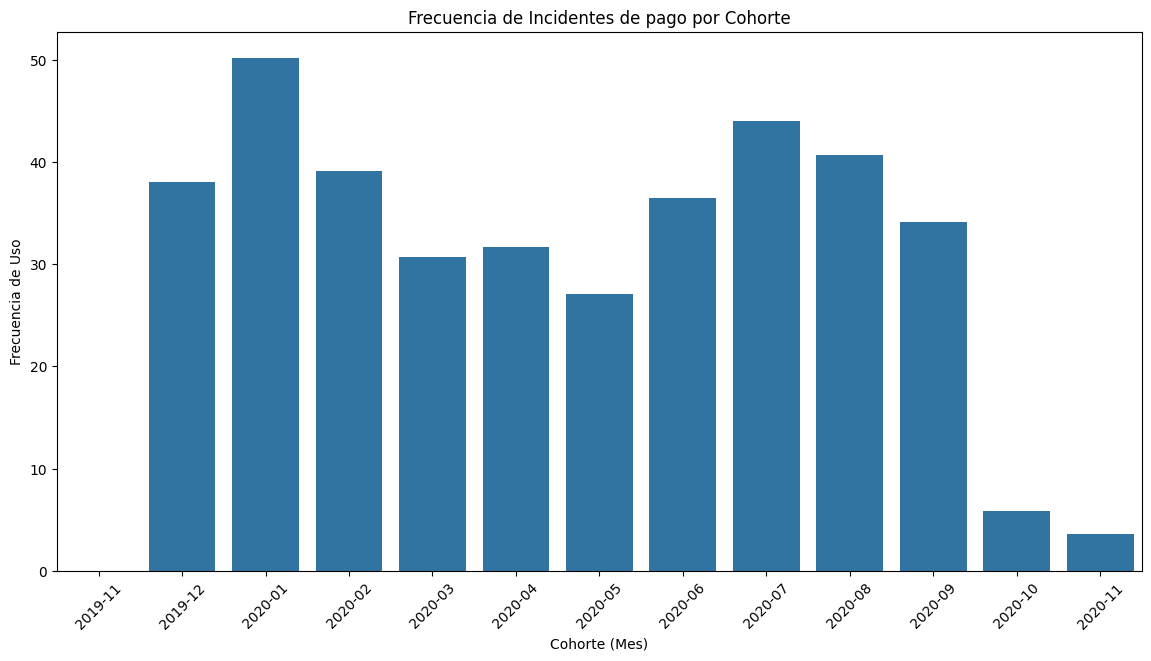

In [109]:
# Guardamos las filas del dataframe donde el 'status' == 'rejected' en un nuevo dataframe llamado 'incidentes'
incidentes = cash_request[cash_request['status'] == 'rejected']

# Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas
incidentes_status = incidentes.groupby(by='mes_cohorte').agg({ 
  'id': 'count'   # Contamos el número de transacciones por mes de cohorte
})

porcentaje = (incidentes_status / cohortes_count) * 100

plt.figure(figsize=(14, 7)) # Tamaño de la figura

# Barplot de la variable id en función de mes_cohorte
sns.barplot(x='mes_cohorte', y='id', data=porcentaje)   # 
plt.title('Frecuencia de Incidentes de pago por Cohorte')   # Título del barplot
plt.xlabel('Cohorte (Mes)')                                 # Etiqueta del eje x
plt.ylabel('Frecuencia de Uso')                             # Etiqueta del eje y
plt.xticks(rotation=45)                                     # Los nombres del eje X, los ponemos a 45 grados


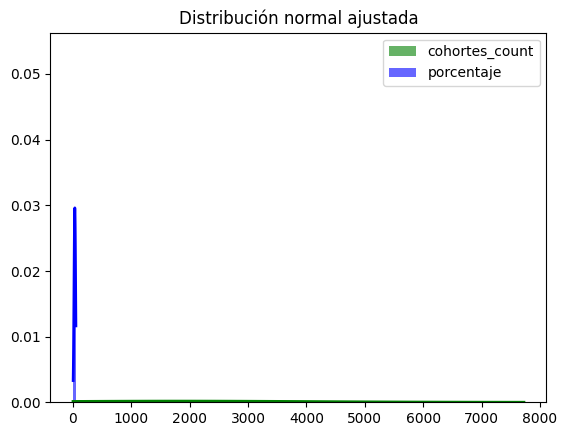

In [120]:
# Obtener los datos de la columna 'id'
numerical_data1 = cohortes_count['id']
numerical_data2 = porcentaje['id']

# Eliminar filas con valores no finitos en numerical_data2
numerical_data2 = numerical_data2[np.isfinite(numerical_data2)]

# Calcular la distribución normal para numerical_data1
mu1, std1 = stats.norm.fit(numerical_data1)
x1 = np.linspace(numerical_data1.min(), numerical_data1.max(), 100)
p1 = stats.norm.pdf(x1, mu1, std1)

# Calcular la distribución normal para numerical_data2
mu2, std2 = stats.norm.fit(numerical_data2)
x2 = np.linspace(numerical_data2.min(), numerical_data2.max(), 100)
p2 = stats.norm.pdf(x2, mu2, std2)

# Crear el histograma y las líneas curvas para numerical_data1
plt.hist(numerical_data1, bins=5, density=True, alpha=0.6, color='g', label='cohortes_count')
plt.plot(x1, p1, 'g', linewidth=2)

# Crear el histograma y las líneas curvas para numerical_data2
plt.hist(numerical_data2, bins=5, density=True, alpha=0.6, color='b', label='porcentaje')
plt.plot(x2, p2, 'b', linewidth=2)

# Añadir título y leyenda
plt.title('Distribución normal ajustada')
plt.legend()
plt.show()


In [124]:
# Convertir los datos en DataFrames
cohortes_count = pd.DataFrame(cohortes_count)
porcentaje = pd.DataFrame(porcentaje)

# Eliminar filas con valores no finitos en porcentaje
porcentaje = porcentaje[np.isfinite(porcentaje)]

# Calcular la distribución normal para cohortes_count
mu1, std1 = stats.norm.fit(cohortes_count['id'])
xmin1, xmax1 = cohortes_count['id'].min(), cohortes_count['id'].max()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = stats.norm.pdf(x1, mu1, std1)

# Calcular la distribución normal para porcentaje
mu2, std2 = stats.norm.fit(porcentaje['id'])
xmin2, xmax2 = porcentaje['id'].min(), porcentaje['id'].max()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = stats.norm.pdf(x2, mu2, std2)

# Crear el histograma y las líneas curvas para cohortes_count
plt.hist(cohortes_count['id'], bins=5, density=True, alpha=0.6, color='g', label='cohortes_count')
plt.plot(x1, p1, 'g', linewidth=2)

# Crear el histograma y las líneas curvas para porcentaje
plt.hist(porcentaje['id'], bins=5, density=True, alpha=0.6, color='b', label='porcentaje')
plt.plot(x2, p2, 'b', linewidth=2)

# Añadir título y leyenda
plt.title('Distribución normal ajustada')
plt.legend()
plt.show()

ValueError: The data contains non-finite values.